# Problem Set 6

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

## 1. Who will win the elections?
#### 1.

In [220]:
election = pd.read_csv("../Data/us-elections_2000-2020.csv.bz2", sep = "\t")
election.head()

,FIPS,year,state,state2,county,office,candidate,party,candidatevotes,totalvotes,...,LND010200D,EDU695209D,EDU600209D,POP010210D,POP220210D,POP250210D,POP320210D,POP400210D,PST110209D,region
0,1001,2000,Alabama,AL,Autauga,President,Al Gore,democrat,4942.0,17208,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
1,1001,2000,Alabama,AL,Autauga,President,George W. Bush,republican,11993.0,17208,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
2,1001,2004,Alabama,AL,Autauga,President,John Kerry,democrat,4758.0,20081,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
3,1001,2004,Alabama,AL,Autauga,President,George W. Bush,republican,15196.0,20081,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
4,1001,2008,Alabama,AL,Autauga,President,Barack Obama,democrat,6093.0,23641,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south


In [221]:
election.shape

(37390, 22)

In [222]:
election.fillna(method='ffill', inplace=True, limit = 2)

#### 2.

In [223]:
election20 = election[election['year'] == 2020]
election20.head()

,FIPS,year,state,state2,county,office,candidate,party,candidatevotes,totalvotes,...,LND010200D,EDU695209D,EDU600209D,POP010210D,POP220210D,POP250210D,POP320210D,POP400210D,PST110209D,region
10,1001,2020,Alabama,AL,Autauga County,President,Donald Trump,republican,19838.0,27770,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
11,1001,2020,Alabama,AL,Autauga County,President,Joshep Biden,democrat,7503.0,27770,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
22,1003,2020,Alabama,AL,Baldwin County,President,Donald Trump,republican,83544.0,109679,...,2026.93,10855,118585,182265,156153,17105,1348,7992,39463,south
23,1003,2020,Alabama,AL,Baldwin County,President,Joshep Biden,democrat,24578.0,109679,...,2026.93,10855,118585,182265,156153,17105,1348,7992,39463,south
34,1005,2020,Alabama,AL,Barbour County,President,Donald Trump,republican,5622.0,10518,...,904.52,1048,19791,27457,13180,12875,107,1387,699,south


#### 3.
Before fillna:

In [224]:
election20.isna().sum()

FIPS                0
year                0
state               0
state2              0
county              0
office              0
candidate           0
party               0
candidatevotes      0
totalvotes          0
income            104
population        104
LND010200D          0
EDU695209D          0
EDU600209D          0
POP010210D          0
POP220210D          0
POP250210D          0
POP320210D          0
POP400210D          0
PST110209D          0
region              0
dtype: int64

In [225]:
null_data = election20[election20.isnull().any(axis=1)]
print(null_data[['county','income','population']])

                  county  income  population
6278         Maui County     NaN         NaN
6279         Maui County     NaN         NaN
33538   Albemarle County     NaN         NaN
33539   Albemarle County     NaN         NaN
33550   Alleghany County     NaN         NaN
...                  ...     ...         ...
35097    Waynesboro city     NaN         NaN
35108  Williamsburg city     NaN         NaN
35109  Williamsburg city     NaN         NaN
35120    Winchester city     NaN         NaN
35121    Winchester city     NaN         NaN

[104 rows x 3 columns]


After fillna:

In [226]:
election.loc[10,:]

FIPS                        1001
year                        2020
state                    Alabama
state2                        AL
county            Autauga County
office                 President
candidate           Donald Trump
party                 republican
candidatevotes           19838.0
totalvotes                 27770
income                   39883.0
population               55243.0
LND010200D                604.45
EDU695209D                  2285
EDU600209D                 31469
POP010210D                 54571
POP220210D                 42855
POP250210D                  9643
POP320210D                   474
POP400210D                  1310
PST110209D                  7085
region                     south
Name: 10, dtype: object

In [227]:
election.loc[11,:]

FIPS                        1001
year                        2020
state                    Alabama
state2                        AL
county            Autauga County
office                 President
candidate           Joshep Biden
party                   democrat
candidatevotes            7503.0
totalvotes                 27770
income                   39883.0
population               55243.0
LND010200D                604.45
EDU695209D                  2285
EDU600209D                 31469
POP010210D                 54571
POP220210D                 42855
POP250210D                  9643
POP320210D                   474
POP400210D                  1310
PST110209D                  7085
region                     south
Name: 11, dtype: object

#### 4.

In [228]:
election20.isna().sum()

FIPS                0
year                0
state               0
state2              0
county              0
office              0
candidate           0
party               0
candidatevotes      0
totalvotes          0
income            104
population        104
LND010200D          0
EDU695209D          0
EDU600209D          0
POP010210D          0
POP220210D          0
POP250210D          0
POP320210D          0
POP400210D          0
PST110209D          0
region              0
dtype: int64

This is because there are values in the dataframe that don't have any recent values to begin with. (There's no recent data for ffil to pull from)

#### 5.

In [318]:
repub = election20[election20['party'] == 'republican'].copy()
democ = election20[election20['party'] == 'democrat'].copy()
repub = repub.reset_index()
democ = democ.reset_index()
ddiff = democ.candidatevotes - repub.candidatevotes
democ['difference'] = ddiff 
democ['democrat_winners'] = 1.0*(democ.difference > 0) # creates the binary column

#### 6.

In [317]:
democ['population_density'] = (democ.population / democ.LND010200D) # creats pop desity variable
democ['college_grad'] = democ.EDU695209D / democ.population # creates college grad variable

#### 7.

In [265]:
democ.replace([np.inf, -np.inf], np.nan, inplace=True)

#### 8.

In [315]:
m = smf.logit("democrat_winners ~ population_density + college_grad + income + region", data = democ).fit()
m.summary()

Optimization terminated successfully.
         Current function value: 0.305630
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       democrat_winners   No. Observations:                 3058
Model:                          Logit   Df Residuals:                     3051
Method:                           MLE   Df Model:                            6
Date:                Mon, 28 Feb 2022   Pseudo R-squ.:                  0.3219
Time:                        07:40:46   Log-Likelihood:                -934.62
converged:                       True   LL-Null:                       -1378.4
Covariance Type:            nonrobust   LLR p-value:                1.920e-188
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -3.6313      0.299    -12.137      0.000      -4.218      -3.045
region[T.northeast]     0.9505      0.226      4.200      0.000       0.507       1.394
region[T.south]         0.6178      0.163      3.793      0.000       0.299       0.937
region[T.west]          1.5447      0.186      8.323      0.000       1.181       1.908
population_density      0.0028      0.000     10.206      0.000       0.002       0.003
college_grad           51.3201      3.988     12.870      0.000      43.505      59.136
income              -3.591e-05   7.89e-06     -4.552      0.000   -5.14e-05   -2.04e-05
=======================================================================================
"""

#### 9.

This model seems to predict that being in the northeast, south, or west increases the chances of democrat votes, as well as being a college grad, and having a dense population. All of the p values are below 0.05, however it is important to consider that 0.05 is a a reference used in academia, and the p-value significance level might change in different areas. 

## 2. Model AirBnB Price
#### 1.

In [305]:
airb = pd.read_csv("../Data/airbnb-beijing-listings.csv.bz2", usecols = ['price','bedrooms','room_type','accommodates','bathrooms'], thousands = ',')
airb['price'] = airb['price'].str.replace(',', '') 
airb['price'] = airb['price'].str.replace('$', '') 
airb.head()

/tmp/ipykernel_296/3858904536.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  airb['price'] = airb['price'].str.replace('$', '')


,room_type,accommodates,bathrooms,bedrooms,price
0,Entire home/apt,9,2.0,3.0,831.00
1,Private room,2,1.0,1.0,1197.00
2,Entire home/apt,2,1.0,1.0,598.00
3,Entire home/apt,2,1.0,1.0,598.00
4,Entire home/apt,2,1.0,1.0,598.00


In [306]:
airb.shape

(38814, 5)

#### 2.

In [316]:
airb['price'] = pd.to_numeric(airb['price'], errors='coerce')
airb.drop(airb.index[airb['price'] == 0], inplace = True) # gets rid of the $0 air b and b's as these are not reasonable

In [308]:
airb = airb.dropna()

#### 3.

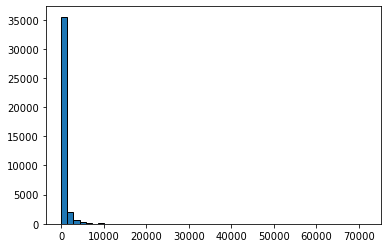

In [309]:
_ = plt.hist(airb['price'], bins = 50, edgecolor = 'black')

It does not look normal, skewed right. It may suggest that we should do a log transformation.

#### 4.

In [310]:
#airb["bedrooms2"] = np.where(airb.bedrooms >= 4, "4 or more", airb.bedrooms.astype(str))
airb["bedrooms2"] = pd.cut(airb.bedrooms,                       
                      bins = [0, 1, 2, 3, 4, np.inf],
                      labels = ["0", "1", "2", "3", "4 or more"],
                      right=False) # categorizes the variabel: bedrooms

#### 5.

In [311]:
m = smf.ols("price ~ bedrooms2", data = airb).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     1093.
Date:                Mon, 28 Feb 2022   Prob (F-statistic):               0.00
Time:                        07:39:49   Log-Likelihood:            -3.4133e+05
No. Observations:               38686   AIC:                         6.827e+05
Df Residuals:                   38681   BIC:                         6.827e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                448.8851    107.166      4.189      0.000     238.837     658.933
bedrooms2[T.1]           -11.6223    107.655     -0.108      0.914    -222.628     199.384
bedrooms2[T.2]           295.9590    108.801      2.720      0.007      82.705     509.213
bedrooms2[T.3]           746.0202    111.966      6.663      0.000     526.565     965.476
bedrooms2[T.4 or more]  2167.8388    111.995     19.357      0.000    1948.326    2387.352
==============================================================================
Omnibus:                    95843.461   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1539629661.103
Skew:                          26.864   Prob(JB):                         0.00
Kurtosis:                     978.842   Cond. No.                         35.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The bedroom categorial effects represent the change in the price for x amount of bedrooms. The R^2 here is 0.101, which is very low so it isn't really a good model.

#### 6.

In [312]:
airb['logarithm'] = np.log(airb['price'])
airb.replace([np.inf, -np.inf], np.nan, inplace=True) # gets rid of the infinite values created by the log function
airb.dropna() # drops the na's created from getting rid of the inifinite values

,room_type,accommodates,bathrooms,bedrooms,price,bedrooms2,logarithm
0,Entire home/apt,9,2.0,3.0,831.0,3,6.722630
1,Private room,2,1.0,1.0,1197.0,1,7.087574
2,Entire home/apt,2,1.0,1.0,598.0,1,6.393591
3,Entire home/apt,2,1.0,1.0,598.0,1,6.393591
4,Entire home/apt,2,1.0,1.0,598.0,1,6.393591
...,...,...,...,...,...,...,...
38809,Private room,2,1.0,1.0,598.0,1,6.393591
38810,Entire home/apt,8,3.0,4.0,2175.0,4 or more,7.684784
38811,Private room,6,1.0,1.0,239.0,1,5.476464
38812,Private room,4,1.0,1.0,225.0,1,5.416100


In [319]:
m = smf.ols("logarithm ~ bedrooms2", data = airb).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logarithm   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     4562.
Date:                Mon, 28 Feb 2022   Prob (F-statistic):               0.00
Time:                        07:50:02   Log-Likelihood:                -40076.
No. Observations:               38686   AIC:                         8.016e+04
Df Residuals:                   38681   BIC:                         8.020e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5.8117      0.044    130.662      0.000       5.724       5.899
bedrooms2[T.1]            -0.0323      0.045     -0.724      0.469      -0.120       0.055
bedrooms2[T.2]             0.5306      0.045     11.749      0.000       0.442       0.619
bedrooms2[T.3]             0.9396      0.046     20.219      0.000       0.848       1.031
bedrooms2[T.4 or more]     1.5931      0.046     34.272      0.000       1.502       1.684
==============================================================================
Omnibus:                     3876.704   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16891.857
Skew:                           0.418   Prob(JB):                         0.00
Kurtosis:                       6.128   Cond. No.                         35.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The log model leaves a better r^2 representation.
#### 7.

In [321]:
airb["bathrooms2"] = pd.cut(airb.bedrooms,
                      bins = [0, 1, 2, 3, np.inf],
                      labels = ["0", "1", "2", "3 or more"],
                      right=False)
airb["accommodates2"] = pd.cut(airb.accommodates,
                      bins = [1, 2, 3, 4, np.inf],
                      labels = ["1", "2", "3", "4 or more"],
                      right=False)
m = smf.ols("logarithm ~ bedrooms2 + room_type + accommodates2 + bathrooms2", data = airb).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logarithm   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     3038.
Date:                Mon, 28 Feb 2022   Prob (F-statistic):               0.00
Time:                        07:50:35   Log-Likelihood:                -36337.
No. Observations:               38686   AIC:                         7.270e+04
Df Residuals:                   38675   BIC:                         7.279e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      5.5853      0.043    131.104      0.000       5.502       5.669
bedrooms2[T.1]              2.089e+08   2.35e+08      0.890      0.374   -2.51e+08    6.69e+08
bedrooms2[T.2]              1.715e+09   1.93e+09      0.890      0.374   -2.06e+09    5.49e+09
bedrooms2[T.3]             -3.181e+11   3.58e+11     -0.890      0.374   -1.02e+12    3.83e+11
bedrooms2[T.4 or more]     -3.181e+11   3.58e+11     -0.890      0.374   -1.02e+12    3.83e+11
room_type[T.Private room]     -0.3139      0.008    -41.833      0.000      -0.329      -0.299
room_type[T.Shared room]      -0.9189      0.017    -53.900      0.000      -0.952      -0.885
accommodates2[T.2]             0.3330      0.014     24.332      0.000       0.306       0.360
accommodates2[T.3]             0.3979      0.017     23.545      0.000       0.365       0.431
accommodates2[T.4 or more]     0.6240      0.016     39.742      0.000       0.593       0.655
bathrooms2[T.1]            -2.089e+08   2.35e+08     -0.890      0.374   -6.69e+08    2.51e+08
bathrooms2[T.2]            -1.715e+09   1.93e+09     -0.890      0.374   -5.49e+09    2.06e+09
bathrooms2[T.3 or more]     3.181e+11   3.58e+11      0.890      0.374   -3.83e+11    1.02e+12
==============================================================================
Omnibus:                     9145.640   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49585.063
Skew:                           1.034   Prob(JB):                         0.00
Kurtosis:                       8.147   Cond. No.                     4.49e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.07e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## THE BEDROOM/BATHROOM NUMBERS ARE OFF
Spent a while trying to perfect the bed/bath numbers, to no avail.
- This data is interesting, it shows us what people value when looking for places to stay. The coefficients that are larger mean that the price will increase that amount for that category, for example, a shared room will decrease the price from the intercept by 0.9189 but a private room will only decrease the price by 0.3139, all of the prices being log form, of course. The R^2 here is 0.440, which is much better than the other models, meaning that the # of bathrooms, room type, and accommodations do factor into the price. Reference categories are 0 bathrooms/bedrooms, whole house room type, and accommodates 1.

I spent 8 hours on this problem set.